source module for methodsNM imported.


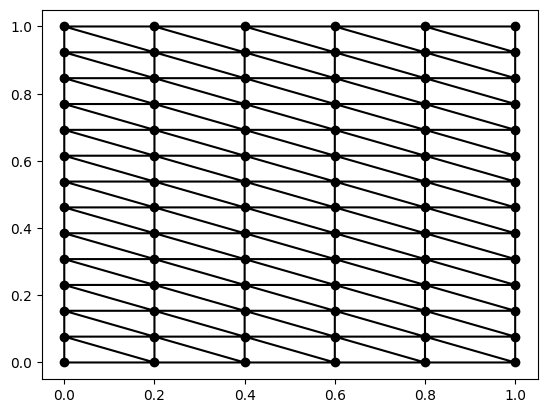

In [1]:
from import_hack import *
from methodsnm.mesh_2d import *
from methodsnm.visualize import *
mesh = StructuredRectangleMesh(5,13)
DrawMesh2D(mesh)

from methodsnm.fes import *
fes = P1_Triangle_Space(mesh)

In [2]:
from numpy.linalg import det, inv
for elnr, verts in enumerate(mesh.elements()):
    trafo = mesh.trafo(elnr)
    print(f"Element {elnr}:" ,inv(trafo.jac), verts)

Element 0: [[ 5.  0.]
 [ 0. 13.]] [0 1 6]
Element 1: [[ 5.  0.]
 [ 0. 13.]] [ 6  7 12]
Element 2: [[ 5.  0.]
 [ 0. 13.]] [12 13 18]
Element 3: [[ 5.  0.]
 [ 0. 13.]] [18 19 24]
Element 4: [[ 5.  0.]
 [ 0. 13.]] [24 25 30]
Element 5: [[ 5.  0.]
 [ 0. 13.]] [30 31 36]
Element 6: [[ 5.  0.]
 [ 0. 13.]] [36 37 42]
Element 7: [[ 5.  0.]
 [ 0. 13.]] [42 43 48]
Element 8: [[ 5.  0.]
 [ 0. 13.]] [48 49 54]
Element 9: [[ 5.  0.]
 [ 0. 13.]] [54 55 60]
Element 10: [[ 5.  0.]
 [ 0. 13.]] [60 61 66]
Element 11: [[ 5.  0.]
 [ 0. 13.]] [66 67 72]
Element 12: [[ 5.  0.]
 [ 0. 13.]] [72 73 78]
Element 13: [[ 5.  0.]
 [ 0. 13.]] [1 2 7]
Element 14: [[ 5.  0.]
 [ 0. 13.]] [ 7  8 13]
Element 15: [[ 5.  0.]
 [ 0. 13.]] [13 14 19]
Element 16: [[ 5.  0.]
 [ 0. 13.]] [19 20 25]
Element 17: [[ 5.  0.]
 [ 0. 13.]] [25 26 31]
Element 18: [[ 5.  0.]
 [ 0. 13.]] [31 32 37]
Element 19: [[ 5.  0.]
 [ 0. 13.]] [37 38 43]
Element 20: [[ 5.  0.]
 [ 0. 13.]] [43 44 49]
Element 21: [[ 5.  0.]
 [ 0. 13.]] [49 50 55]
Elem

## Verification Example for the time integral: 

In the following, we consider the simple ordinary differential equation:

$
\frac{\partial u}{\partial t} = \cos(t)
$

This problem is purely time-dependent and serves as a minimal test case to verify the correct implementation of the time integral assembling procedure in the finite element framework.


l2diff = 0.0069178156871160254


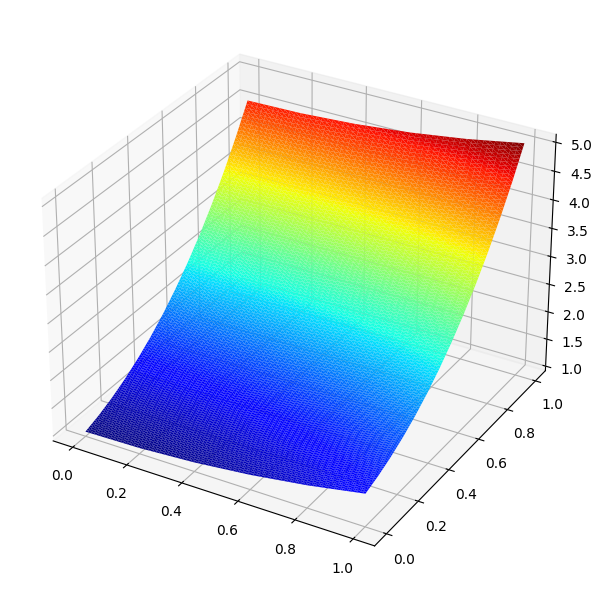

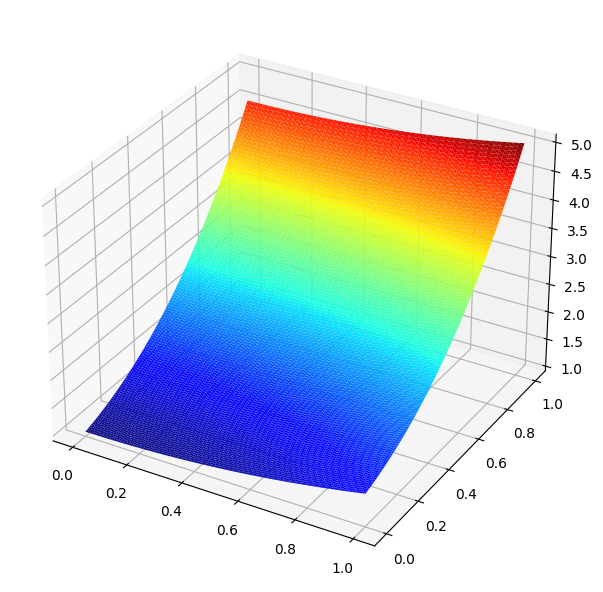

In [3]:
from methodsnm.forms import *
from methodsnm.formint import *
from numpy import pi, cos ,sin ,exp
import numpy as np
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import spsolve
from methodsnm.solver import solve_on_freedofs

blf = BilinearForm(fes)
c = ConstantVectorFunction(np.array([0,1]), mesh = mesh)
blf += ConvectionIntegral(c)
blf.assemble()

lf = LinearForm(fes)
f = GlobalFunction(lambda x: x[1]**2 + 3*x[1] + exp(x[1]) , mesh = mesh)
lf += SourceIntegral(f)
lf.assemble()

def list_diff(a, b):
    """Entfernt alle Elemente aus Liste a, die in Liste b enthalten sind."""
    return [x for x in a if x not in b]

uh = FEFunction(fes)
F = lambda x: x[1]**3 /3 + 3*x[1]**2 / 2 + x[0]**2 / 2 + exp(x[1])
uh._set(F, True)
res = lf.vector - blf.matrix.dot(uh.vector)

from scipy.sparse.linalg import spsolve
from methodsnm.solver import solve_on_freedofs
freedofs = list_diff(mesh.vertices,mesh.bndry_vertices)
np.set_printoptions(threshold=np.inf)
uh.vector += solve_on_freedofs(blf.matrix,res,freedofs)

from methodsnm.forms import compute_difference_L2
uex =  GlobalFunction(F, mesh = mesh)
l2diff = compute_difference_L2(uh, uex, mesh, intorder = 5)

print("l2diff =", l2diff)

DrawFunction2D(uh)
DrawFunction2D(uex)

l2diff = 0.003026656860712472


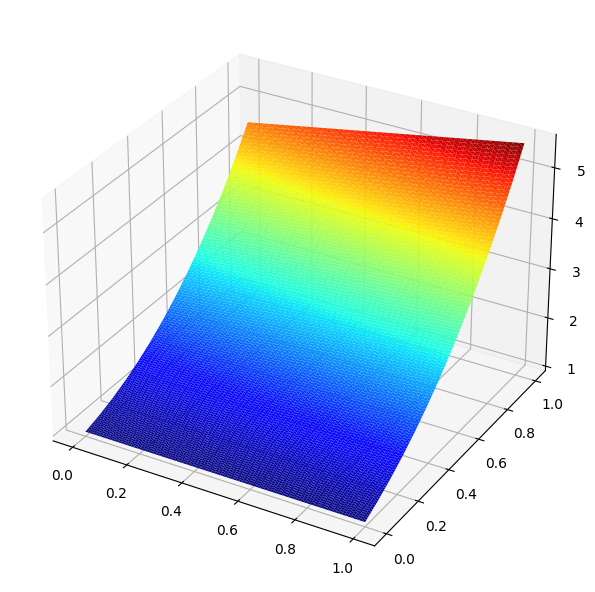

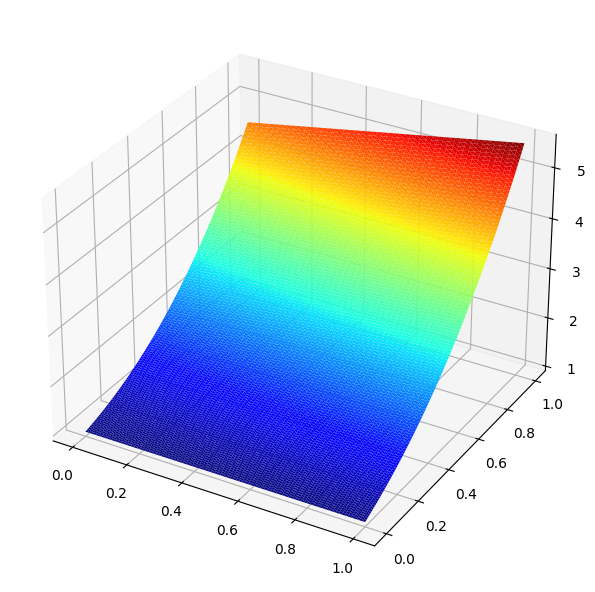

In [4]:
from methodsnm.forms import *
from methodsnm.formint import *
from numpy import pi, cos ,sin ,exp
import numpy as np
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import spsolve
from methodsnm.solver import solve_on_freedofs

blf3 = BilinearForm(fes)
c = GlobalFunction(lambda x: 1, mesh = mesh)
blf3 += TimeIntegral(c)
blf3.assemble()

lf3 = LinearForm(fes)
f3 = GlobalFunction(lambda x: x[1]**2 + 3*x[1] + exp(x[1]) +x[0], mesh = mesh)
lf3 += SourceIntegral(f3)
lf3.assemble()

def list_diff(a, b):
    """Entfernt alle Elemente aus Liste a, die in Liste b enthalten sind."""
    return [x for x in a if x not in b]

uh3 = FEFunction(fes)
F = lambda x: x[1]**3 /3 + 3*x[1]**2 / 2 + exp(x[1]) +x[0]*x[1]
uh3._set(F, True)
res = lf3.vector - blf3.matrix.dot(uh3.vector)

from scipy.sparse.linalg import spsolve
from methodsnm.solver import solve_on_freedofs
freedofs = list_diff(mesh.vertices,mesh.bndry_vertices)
uh3.vector += solve_on_freedofs(blf3.matrix,res,freedofs)
from methodsnm.forms import compute_difference_L2

uex =  GlobalFunction(F, mesh = mesh)
l2diff = compute_difference_L2(uh3, uex, mesh, intorder = 5)

print("l2diff =", l2diff)
DrawFunction2D(uh3)
DrawFunction2D(uex)

## Verification Example for the space-laplaceintegral: 

In the following, we consider the simple ordinary differential equation:

$
-\Delta u(x) = f(x), \quad x \in \Omega
$

This problem is purely location-dependent and serves as a minimal test case to verify the correct implementation of the time integral assembling procedure in the finite element framework.

l2diff = 0.0018999679023976909


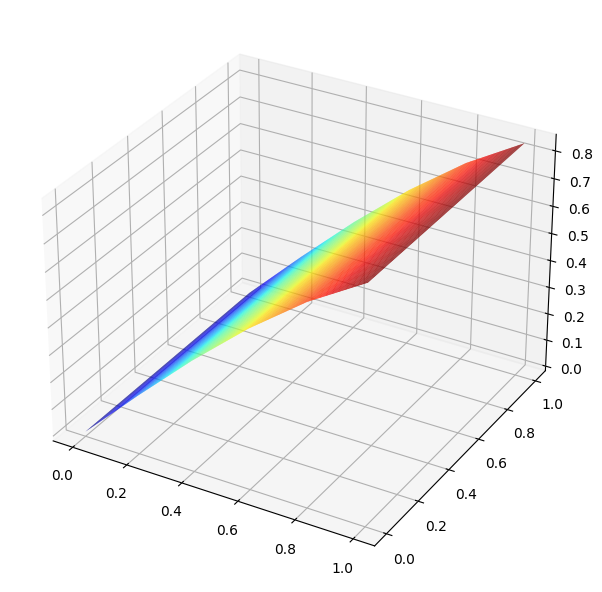

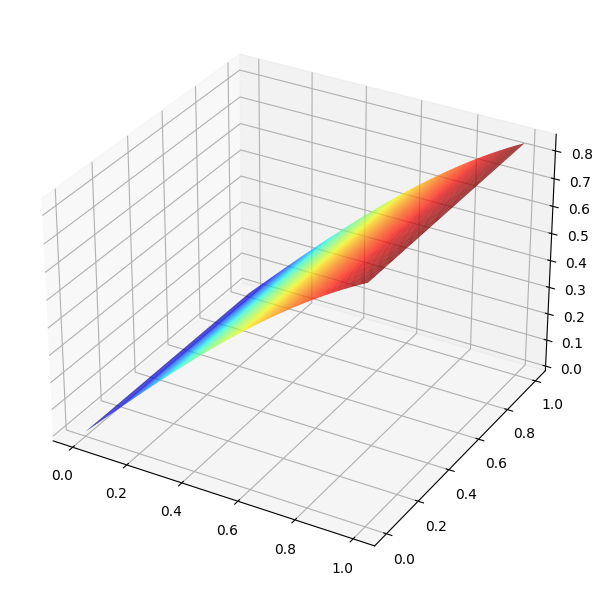

In [5]:
blf3 = BilinearForm(fes)
c = GlobalFunction(lambda x: 1, mesh = mesh)
blf3 += LaplaceIntegral_without_time(c)
blf3.assemble()

lf3 = LinearForm(fes)
f3 = GlobalFunction(lambda x: sin(x[0]), mesh = mesh)
lf3 += SourceIntegral(f3)
lf3.assemble()

uh3 = FEFunction(fes)
f4 = lambda x: sin(x[0])
uh3._set(f4, True)
res = lf3.vector - blf3.matrix.dot(uh3.vector)

from scipy.sparse.linalg import spsolve
from methodsnm.solver import solve_on_freedofs
freedofs = list_diff(mesh.vertices,mesh.bndry_vertices)
uh3.vector += solve_on_freedofs(blf3.matrix,res,freedofs)
from methodsnm.forms import compute_difference_L2

uex =  GlobalFunction(f4, mesh = mesh)
l2diff = compute_difference_L2(uh3, uex, mesh, intorder = 5)

print("l2diff =", l2diff)
DrawFunction2D(uh3)
DrawFunction2D(uex)

## Verification Example: Solving the parabolic PDE 

In the following, we consider the simple ordinary differential equation:

$-\Delta u + \frac{\partial u}{\partial t} = f$

This problem is now space and time-dependent and serves as a minimal test case to verify the correct implementation of the time+space integral assembling procedure in the finite element framework.

l2diff = 0.011836737408437686


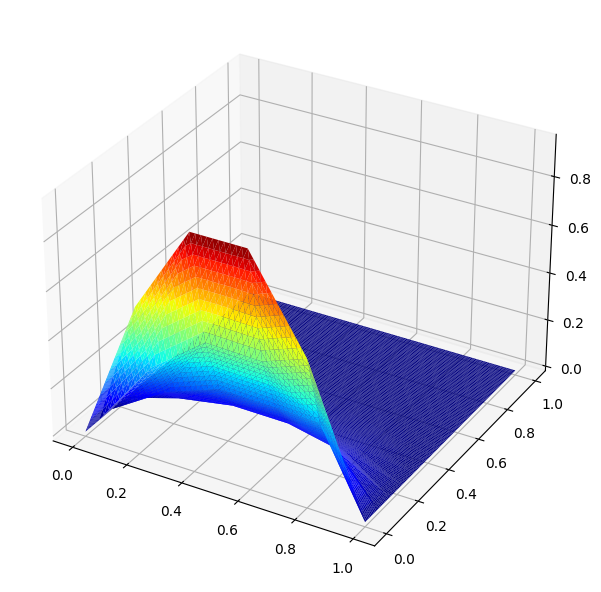

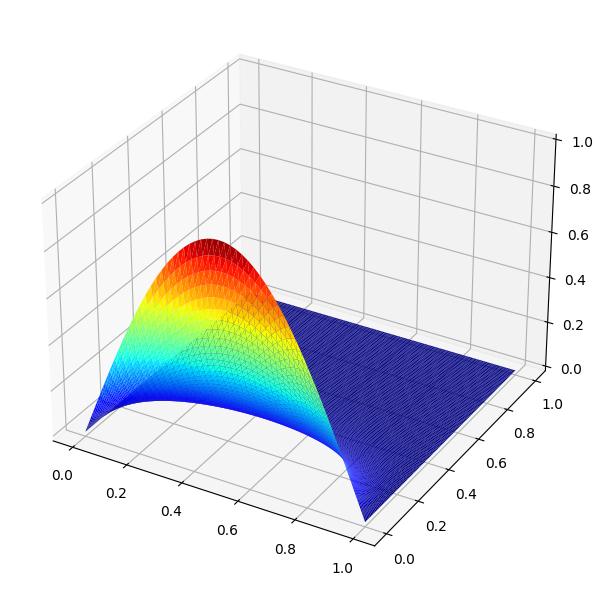

In [6]:


blf3 = BilinearForm(fes)
c = GlobalFunction(lambda x: 1, mesh = mesh)
blf3 += TimeIntegral(c)
blf3 += LaplaceIntegral_without_time(c)
blf3.assemble()

lf3 = LinearForm(fes)
f3 = GlobalFunction(lambda x: 0, mesh = mesh)
lf3 += SourceIntegral(f3)
lf3.assemble()
                                                                                                                   
def list_diff(a, b):
    """Entfernt alle Elemente aus Liste a, die in Liste b enthalten sind."""
    return [x for x in a if x not in b]

top = mesh.filter_bndry_points("max",1)
bottom = mesh.filter_bndry_points("min",1)
left = mesh.filter_bndry_points("min",0)
right = mesh.filter_bndry_points("max",0)
bndry = left + right + bottom


uh3 = FEFunction(fes)
f4 = lambda x: sin(pi*x[0])
uh3._set(f4, bndry)
res = lf3.vector - blf3.matrix.dot(uh3.vector)

from scipy.sparse.linalg import spsolve
from methodsnm.solver import solve_on_freedofs
freedofs = list_diff(mesh.vertices,bndry)
uh3.vector += solve_on_freedofs(blf3.matrix,res,freedofs)
from methodsnm.forms import compute_difference_L2

uex =  GlobalFunction(lambda x: sin(pi*x[0])*np.exp(-x[1]*pi**2), mesh = mesh)
l2diff = compute_difference_L2(uh3, uex, mesh, intorder = 5)

print("l2diff =", l2diff)
DrawFunction2D(uh3)
DrawFunction2D(uex)

## Problem Setup

We are going to solve the following partial differential equation (PDE) on a **space-time domain**:

$
\partial_t u - \varepsilon \, \partial_{xx} u + w \, \partial_x u = f
$

where:

- $ u = u(x,t) $ is the unknown function,
- $ \varepsilon > 0 $ is the diffusion coefficient,
- $ w \in \mathbb{R}$ is a constant convection velocity,
- $ f = f(x,t) $ is a given source term.

### Domain

We consider the **space-time domain**:

$
Q := \Omega \times (0, T), \quad \text{where} \quad \Omega = [0,1], \quad T > 0
$

### Goal

Our goal is to solve this PDE on a **space-time mesh**, treating time as an additional coordinate. This allows for fully variational discretizations in both space and time.



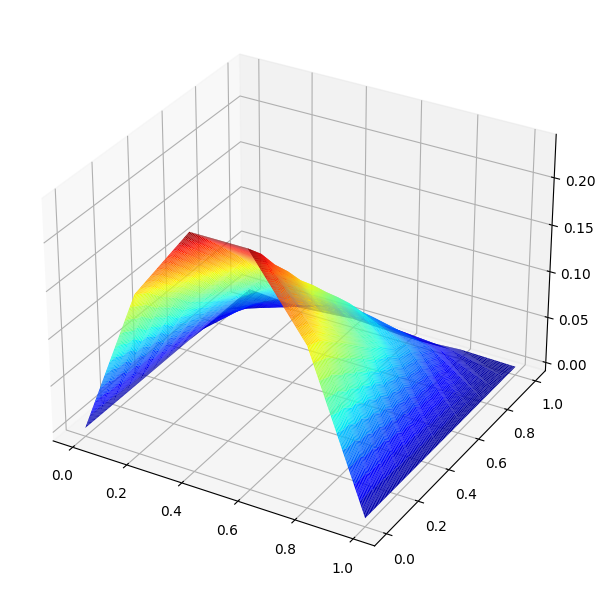

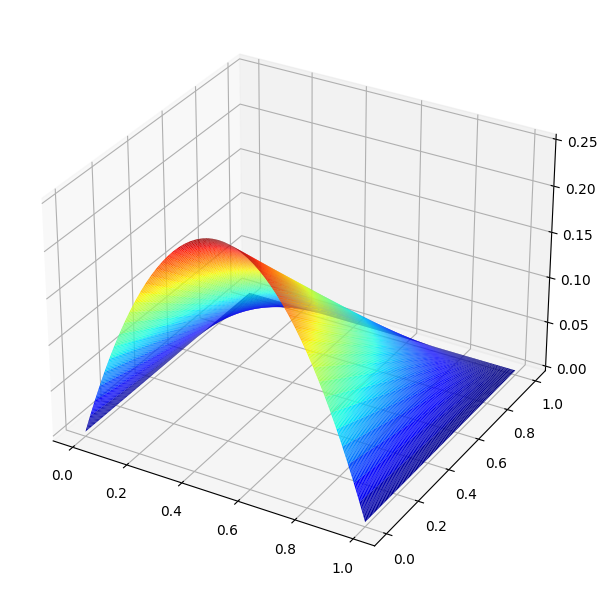

l2diff = 0.004133405873970012


In [7]:
epsi = 0.1
wind = 50
eps = GlobalFunction(lambda x: epsi, mesh = mesh)
w = ConstantVectorFunction(np.array([wind,1]), mesh = mesh)

blf = BilinearForm(fes)
blf += LaplaceIntegral_without_time(eps)
blf += ConvectionIntegral(w)
blf.assemble()

f = lambda x: (-x[0] * (1 - x[0])+ 2 * epsi * (1 - x[1])+ wind * (1 - 2 * x[0]) * (1 - x[1]))
f = GlobalFunction(f, mesh = mesh)
lf = LinearForm(fes)
lf += SourceIntegral(f)
lf.assemble()

top = mesh.filter_bndry_points("max",1)
bottom = mesh.filter_bndry_points("min",1)
left = mesh.filter_bndry_points("min",0)
right = mesh.filter_bndry_points("max",0)
bndry = left + right + bottom
freedofs = list_diff(mesh.vertices,bndry)

uex = lambda x: x[0]*(1-x[0])*(1-x[1])
uh = FEFunction(fes)
uh._set(uex, bndry)

res = lf.vector - blf.matrix.dot(uh.vector)
uh.vector += solve_on_freedofs(blf.matrix,res,freedofs)
from methodsnm.forms import compute_difference_L2
u_exact = GlobalFunction(uex, mesh = mesh)
l2diff = compute_difference_L2(uh, u_exact, mesh, intorder = 5)

DrawFunction2D(uh)
DrawFunction2D(u_exact)
print("l2diff =", l2diff)
